<a href="https://colab.research.google.com/github/alohadaun/Project1/blob/main/Project_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔥 Goal**
##  **다음 분기에 어떤 게임을 설계해야 할까?**



# **목차**
1.   데이터셋 생성, 정보 확인
2.   EDA 및 전처리
3.   분석
4.   결론

## **1. 데이터셋 생성 및 정보 확인**

In [112]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [113]:
!pip install scipy --upgrade

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'

game = pd.read_csv(url, index_col = 0)
game.head(85)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
81,Dynasty Warriors Advance,GBA,2005.0,Action,Nintendo,0.08,0.03,0,0
82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
83,Mobile Suit Gundam: Perfect One Year War,PS,1997.0,Strategy,Namco Bandai Games,0,0,0.14,0.01
84,Billy Hatcher and the Giant Egg,GC,2003.0,Platform,Sega,0.19,0.05,0,0.01


In [4]:
# Year, Genre, Publisher 컬럼에 결측치 존재
# 출고량의 형변화 필요 (문자 > 숫자)

game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


## **2. EDA 및 전처리**

In [5]:
# 출고량을 숫자로 변경하고, K/M 처리를 위한 함수 작성
def tozero(x):
    if 'K' in x:
        x = x.replace('K','')
        x = float(x)/1000
    elif 'M' in x:
        x = x.replace('M','')
    return float(x)

# 각 출고량 컬럼에 함수 적용
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    game[col] = game[col].apply(tozero)

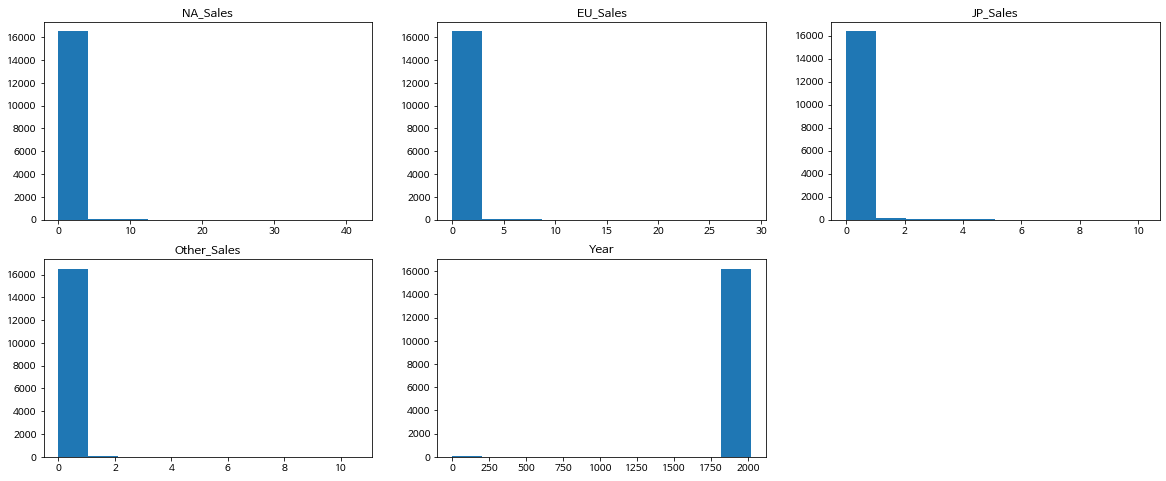

In [6]:
# 컬럼별 데이터 분포 확인
# Year 컬럼 이상치로 의심되는 데이터 확인, 네자리수가 아닌 0~250 사이의 데이터 확인.

plt.figure(figsize = (20, 8))

for i, col in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year']):
    plt.subplot(2, 3, i+1)
    plt.hist(game[col])
    plt.title(col)
plt.show();

In [7]:
# Year 컬럼 이상치 처리
# 0~16은 2000년대로 변경, 86~98은 1900년대로 변경하는 함수 작성

def year(y):
    if y <= 16:
        y = y + 2000
    elif y >= 16 and y <= 98:
        y = y + 1900
    return y

game['Year'] = game['Year'].apply(year)

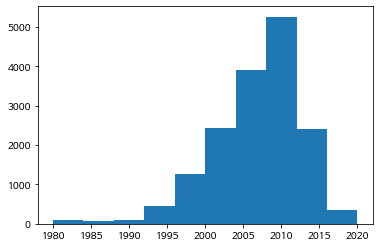

In [8]:
# Year 컬럼의 데이터가 정상적으로 분포된 것을 확인
plt.hist(game['Year']);

In [9]:
# 결측치 제거

game.dropna(how = 'any', inplace = True)

game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [10]:
# 모든 국가의 출고량을 합산한 컬럼 추가하기

game['All_Sales'] = game['NA_Sales'] + game['EU_Sales'] + game['JP_Sales'] + game['Other_Sales']

game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


## **3. 분석**

In [11]:
# 각 나라의 게임 출고량을 장르로 그룹화 하기
genre = game[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre.columns = ['장르', '북미 출고량', '유럽 출고량', '일본 출고량', '그외 국가 출고량']

genre_group = genre.groupby(['장르']).mean()
genre_group.reset_index(inplace = True)

genre_group

,장르,북미 출고량,유럽 출고량,일본 출고량,그외 국가 출고량
0,Action,0.265046,0.158531,0.048333,0.056787
1,Adventure,0.080276,0.050205,0.040907,0.013170
2,Fighting,0.263892,0.119641,0.104359,0.043293
3,Misc,0.234819,0.123825,0.061975,0.043212
4,Platform,0.510172,0.229817,0.149519,0.058935
5,Puzzle,0.214806,0.089170,0.099364,0.021979
6,Racing,0.290976,0.192797,0.046202,0.062765
7,Role-Playing,0.217584,0.124976,0.234082,0.038724
8,Shooter,0.448812,0.242367,0.029828,0.079578
9,Simulation,0.214456,0.133558,0.075106,0.037021


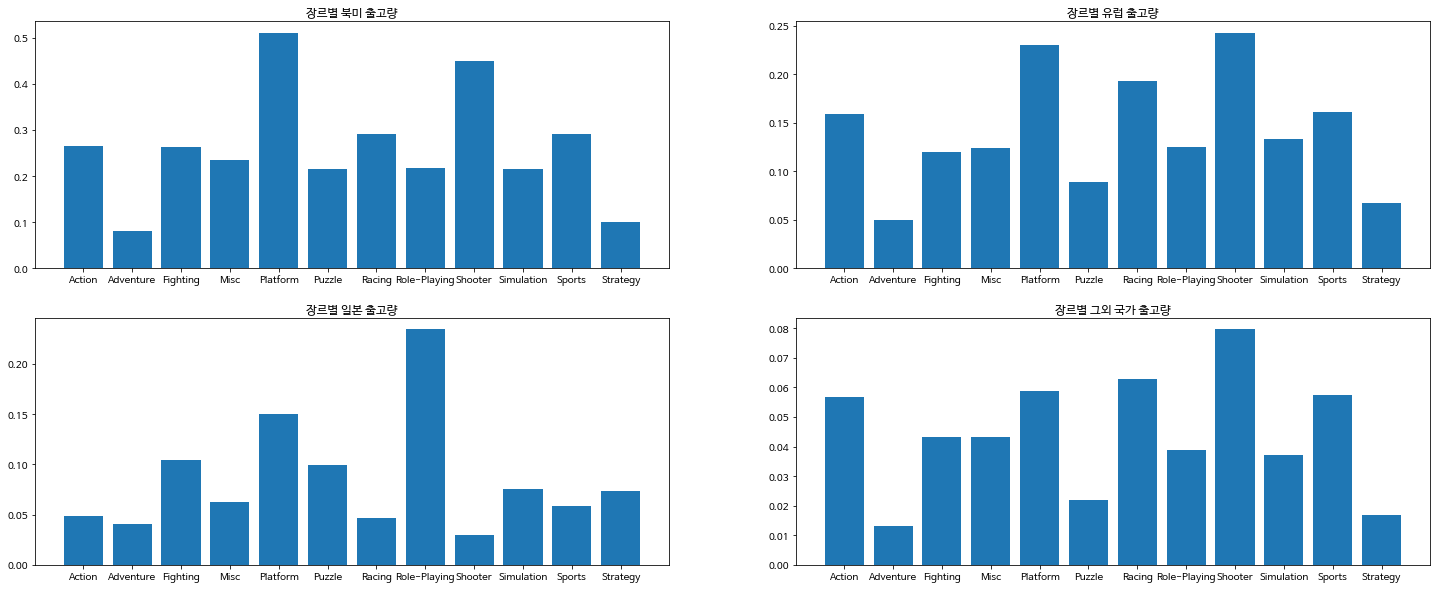

In [12]:
# 장르별 각 나라의 게임 출고량 시각화 2

fig, ax = plt.subplots(2, 2, figsize = (25, 10))

ax[0, 0].bar(genre_group['장르'], genre_group['북미 출고량'])
ax[0, 0].set_title('장르별 북미 출고량')

ax[0, 1].bar(genre_group['장르'], genre_group['유럽 출고량'])
ax[0, 1].set_title('장르별 유럽 출고량')

ax[1, 0].bar(genre_group['장르'], genre_group['일본 출고량'])
ax[1, 0].set_title('장르별 일본 출고량')

ax[1, 1].bar(genre_group['장르'], genre_group['그외 국가 출고량'])
ax[1, 1].set_title('장르별 그외 국가 출고량')

plt.show()

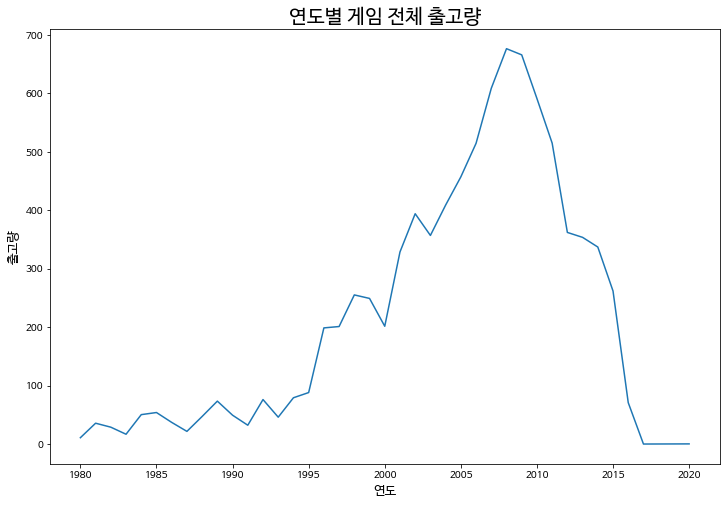

In [13]:
# 각 나라의 게임 출고량 시각화

plt.figure(figsize = (12, 8))
plt.plot(game.groupby('Year')['All_Sales'].sum())
plt.title('연도별 게임 전체 출고량', fontsize = 20)
plt.xlabel('연도', fontsize = 13)
plt.ylabel('출고량', fontsize = 13)

plt.show();

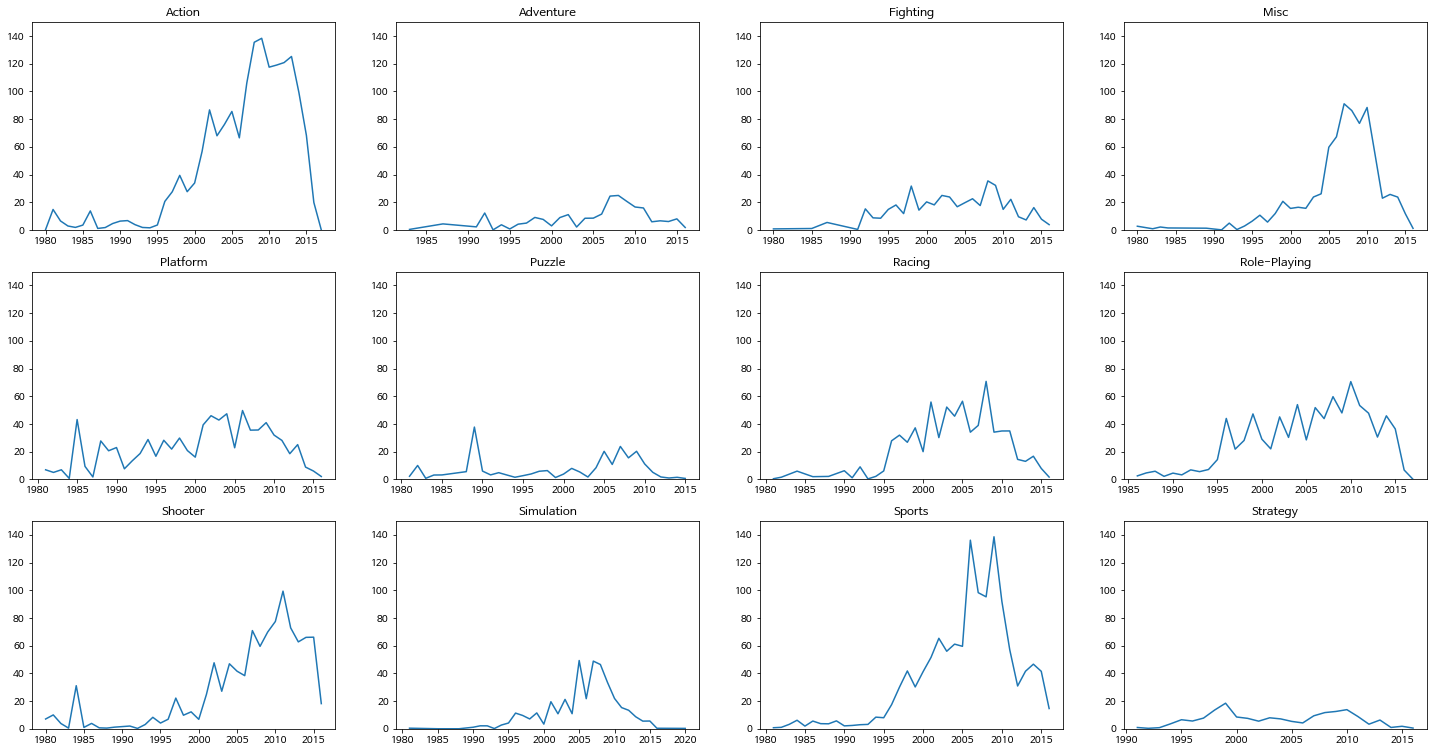

In [14]:
# 연도별 게임 장르의 출고량 시각화
genre_trend = list(game['Genre'].unique())

genre_trend.sort()

fig2, ax2 = plt.subplots(3, 4, figsize=(25, 13))

for i, ge in enumerate(genre_trend) :
    if i <= 3 :
        r = 0
    elif i > 3 and i <= 7 :
        r = 1
    elif i > 7 and i <= 11 :
        r = 2

    j = i % 4

    df = game[game['Genre'] == ge]

    df2 = df.groupby('Year')['All_Sales'].sum()

    ax2[r,j].plot(df2)
    ax2[r,j].set_title(ge)
    ax2[r,j].set_ylim(0, 150)
plt.show()

### **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [15]:
top_sales = game.copy()
top_sales.index = top_sales['Name']

print(top_sales['All_Sales'].nlargest(10)) # 출고량이 가장 높은 게임 TOP 10
print(top_sales[top_sales['Year'] >= 2010]['All_Sales'].nlargest(10)) # 최근 10년간 출고량이 가장 높은 게임 TOP 10

Name
Wii Sports                   82.74
Super Mario Bros.            40.24
Mario Kart Wii               35.83
Wii Sports Resort            33.00
Pokemon Red/Pokemon Blue     31.38
Tetris                       30.26
New Super Mario Bros.        30.01
Wii Play                     29.01
New Super Mario Bros. Wii    28.61
Duck Hunt                    28.31
Name: All_Sales, dtype: float64
Name
Kinect Adventures!                21.82
Grand Theft Auto V                21.39
Grand Theft Auto V                16.38
Pokemon Black/Pokemon White       15.32
Call of Duty: Modern Warfare 3    14.76
Call of Duty: Black Ops           14.64
Call of Duty: Black Ops 3         14.24
Call of Duty: Black Ops II        14.04
Call of Duty: Black Ops II        13.74
Call of Duty: Modern Warfare 3    13.47
Name: All_Sales, dtype: float64


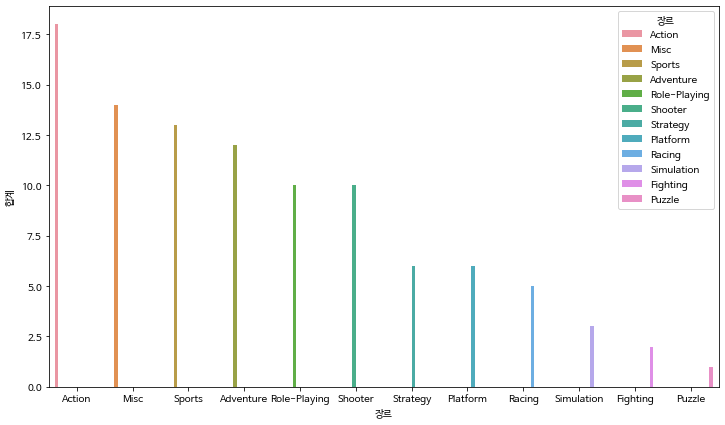

In [16]:
# 최근 10년간 출고량이 높은 게임 장르

genre_sales = top_sales[top_sales['Year'] >= 2010].iloc[:100]['Genre'].value_counts()
genre_sales = pd.DataFrame(genre_sales)
genre_sales.reset_index(inplace = True)
genre_sales.columns = ['장르', '합계']

plt.figure(figsize=(12, 7))

sns.barplot(
    x = '장르',
    y = '합계',
    data = genre_sales,
    hue = '장르'
);

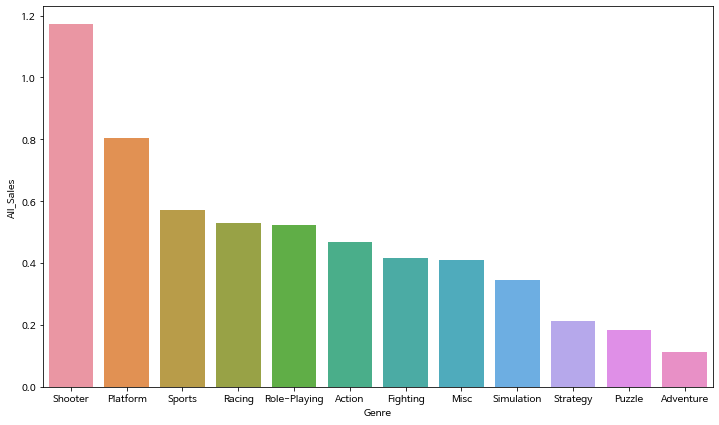

In [17]:
# 최근 10년간 장르별 출고량 평균 순위

Genre_trend = pd.DataFrame(top_sales[top_sales['Year']>=2010].groupby('Genre')['All_Sales'].mean())
Genre_trend.reset_index(inplace = True)
Genre_trend.sort_values('All_Sales', ascending = False, inplace = True)

plt.figure(figsize = (12, 7))

sns.barplot(
    x='Genre',
    y='All_Sales',
    data=Genre_trend
);

In [18]:
# 출고량 상위 3 Genre 평균 비교, Shooter, Platform, Sports 세 장르가 과연 sales에서 유의미한 차이가 있을까?(ANOVA)
from scipy import stats

trend = top_sales[top_sales['Year'] >= 2010]

group1 = trend[trend['Genre'] == 'Shooter']['All_Sales']
group2 = trend[trend['Genre'] == 'Platform']['All_Sales']
group3 = trend[trend['Genre'] == 'Sports']['All_Sales']

#Shooter, Platform, Sports ANOVA
p_value_ano = stats.f_oneway(group1, group2, group3).pvalue

if p_value_ano >= 0.05:
    print('Shooter, Platform, Sports 세 그룹간 평균이 유의미하게 차이나지 않습니다.')
else:
    print('Shooter, Platform, Sports 세 그룹간 평균이 적어도 하나는 유의미하게 차이납니다.')

Shooter, Platform, Sports 세 그룹간 평균이 적어도 하나는 유의미하게 차이납니다.


In [19]:
# Shooter, Platform t-test, 두 데이터는 연관성이 없다고 판단

#등분산 test
p_value_var = stats.levene(group1, group2).pvalue

if p_value_var >= 0.05:
    print('Shooter, Platform 두 그룹은 등분산이다.')
else:
    print('Shooter, Platform 두 그룹은 등분산이 아니다.')

#독립 t-test, 단측 검정
p_value_t = stats.ttest_ind(group1, group2, equal_var = False, alternative = 'greater').pvalue

if p_value_t >= 0.05:
    print('Shooter, Platform 두 그룹간 평균이 유의미하게 차이나지 않습니다.')
else:
    print('Shooter, Platform 두 그룹간 평균이 Shooter가 더 크다.')

Shooter, Platform 두 그룹은 등분산이다.
Shooter, Platform 두 그룹간 평균이 Shooter가 더 크다.


In [20]:
# 최근 shooter를 통한 CI 계산

avg = np.mean(group1)
se = np.std(group1)/np.sqrt(len(group1))

ci = stats.t.interval(.95, loc = avg, scale = se, df = len(group1)-1)

print('Shooter 평균 출고량의 confidence interval : ', (round(ci[0],3), round(ci[1], 3)))

Shooter 평균 출고량의 confidence interval :  (0.943, 1.4)


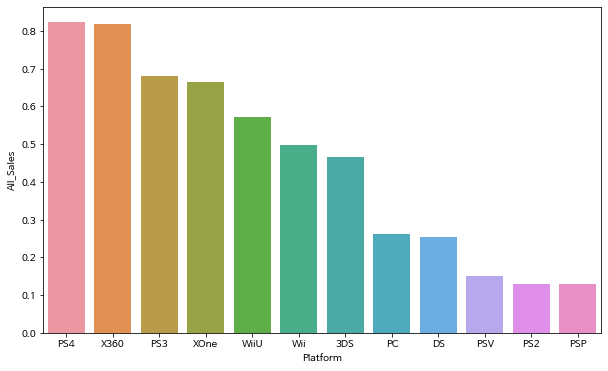

In [21]:
# 최근 평균 출고량이 가장 높은 플랫폼

Platform_total_trend = pd.DataFrame(top_sales[top_sales['Year'] >= 2010].groupby('Platform')['All_Sales'].mean())
Platform_total_trend.reset_index(inplace = True)
Platform_total_trend.sort_values('All_Sales', ascending = False, inplace = True)

plt.figure(figsize = (10, 6))

sns.barplot(
    x='Platform',
    y='All_Sales',
    data=Platform_total_trend
);

In [22]:
# PS4에서 shooter 게임을 잘 만들까??

PS4 = top_sales[top_sales['Platform'] == 'PS4']

PS4['Genre'].value_counts()

Action          121
Role-Playing     47
Sports           43
Shooter          34
Adventure        19
Fighting         17
Racing           17
Misc             15
Platform         11
Simulation        5
Strategy          5
Puzzle            1
Name: Genre, dtype: int64

In [23]:
PS4.groupby('Genre')['All_Sales'].sum().sort_values(ascending=False)

Genre
Action          84.70
Shooter         75.32
Sports          50.10
Role-Playing    25.78
Racing          11.57
Fighting         8.04
Misc             7.37
Platform         6.99
Adventure        4.70
Simulation       0.77
Strategy         0.42
Puzzle           0.02
Name: All_Sales, dtype: float64

In [24]:
PS4.groupby('Genre')['All_Sales'].mean().sort_values(ascending=False)

Genre
Shooter         2.215294
Sports          1.165116
Action          0.700000
Racing          0.680588
Platform        0.635455
Role-Playing    0.548511
Misc            0.491333
Fighting        0.472941
Adventure       0.247368
Simulation      0.154000
Strategy        0.084000
Puzzle          0.020000
Name: All_Sales, dtype: float64

In [25]:
# shooter을 가장 잘 지원해줄 수 있는 platform은??

shooter_platform = pd.DataFrame(top_sales[top_sales['Genre'] == 'Shooter'].groupby('Platform')['All_Sales'].sum().sort_values(ascending=False))
shooter_platform.reset_index(inplace = True)

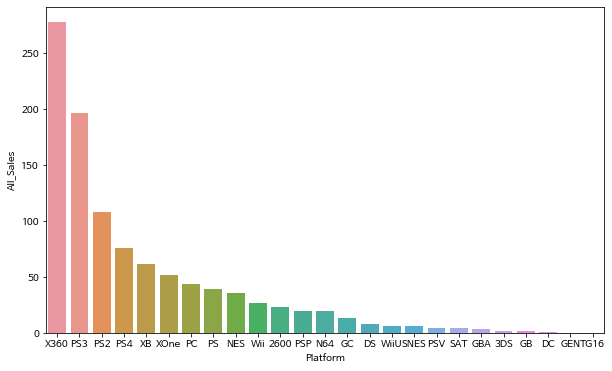

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Platform',
    y='All_Sales',
    data=shooter_platform
);

In [27]:
# 두 변수간 연관성

cross_chi2  = game[['Genre', 'Platform', 'All_Sales']]

cross_chi2 = pd.crosstab(cross_chi2['Genre'], cross_chi2['Platform'])

p_value_chi2 = stats.chi2_contingency(cross_chi2, correction = False)[1]

if p_value_chi2 >= 0.05:
    print('Genre와 Platform 사이의 연관성이 존재한다.')
else:
    print('Genre와 Platform 사이의 연관성이 존재하지 않는다.')

Genre와 Platform 사이의 연관성이 존재하지 않는다.


In [28]:
cross_chi2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,36,13,0,160,0,153,344,369,121,216,141,3,0,12,0,0,229,63,318,152,68
Adventure,1,1,36,11,237,5,35,20,2,0,4,1,0,65,0,66,195,72,19,213,84,26,0,4,1,0,83,3,47,26,11
Fighting,1,0,14,12,36,0,23,42,5,0,29,4,11,5,0,108,146,76,17,73,16,31,0,25,0,0,41,5,64,44,7
Misc,5,0,53,0,388,8,86,35,1,0,17,2,0,22,0,76,217,121,15,104,24,15,2,17,0,0,270,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,30,28,0,11,0,64,101,35,11,35,10,5,1,26,0,0,57,16,24,49,4
Puzzle,8,1,19,0,235,15,39,11,0,0,12,14,0,25,0,32,18,2,1,43,3,5,0,13,0,0,53,4,6,7,0
Racing,4,0,10,6,66,2,64,60,1,0,56,4,0,56,0,143,212,90,17,65,11,8,1,9,0,0,91,3,100,121,19
Role-Playing,0,0,84,4,196,21,72,25,3,0,7,11,0,103,1,96,182,117,47,190,82,17,1,50,0,4,35,6,75,23,13
Shooter,22,0,6,3,42,1,40,48,1,0,24,7,0,145,0,96,158,155,34,37,5,22,0,10,1,0,60,10,197,123,33


## **4. 결론**

Shooter 장르에 대한 이해도가 가장 높은 X360 플랫폼 기반으로 Shooter 게임을 출시한다.